<a href="https://colab.research.google.com/github/Brilrs/Student-Depression-ML/blob/main/Student_depression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Collect**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#EDA
import scipy as scipy
import seaborn as sns

%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format

#Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Collect

-Leer los datos del archivo "student_depression_dataset.csv" en un datagreame llamado "df"

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/BPA/TF/student_depression_dataset.csv", encoding='ISO-8859-1', sep=";")

In [ ]:
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.970,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.900,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.030,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.590,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.130,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


Data Quality & Data Cleaning

Coreccion de cabeceras o headers

In [ ]:
columnas_renombrar = { 'id':'id', 'Gender':'gender', 'Age':'age', 'City':'city', 'Profession':'profession', 'Academic Pressure':'academic_pressure',
    'Work Pressure':'work_pressure','CGPA':'cgpa','Study Satisfaction':'study_satisfaction','Job Satisfaction':'job_satisfaction',
    'Sleep Duration':'sleep_duration','Dietary Habits':'dietary_habits','Degree':'degree','Have you ever had suicidal thoughts ?':'suicidal_thoughts',
    'Work/Study Hours':'work_study_hours','Financial Stress':'financial_stress','Family History of Mental Illness':'family_history_mental_illness','Depression':'depression'
}
df.rename(columns = columnas_renombrar, inplace = True) #inplace True es confirmar los cambios

In [ ]:
df.head()

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness,depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.970,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.900,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.030,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.590,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.130,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


Overview Data


In [ ]:
df.shape

(27901, 18)

Data Type Mismatch

In [ ]:
df.head(3)

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness,depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.970,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.900,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.030,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0


In [ ]:
df.dtypes

,0
id,int64
gender,object
age,int64
city,object
profession,object
academic_pressure,int64
work_pressure,int64
cgpa,float64
study_satisfaction,int64
job_satisfaction,int64


In [ ]:
df['sleep_duration'] = df['sleep_duration'].str.replace("'", "")

In [ ]:
df.head(3)

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness,depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.970,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.900,5,0,5-6 hours,Moderate,BSc,No,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.030,5,0,Less than 5 hours,Healthy,BA,No,9,1,Yes,0


In [ ]:
df['degree'] = df['degree'].str.replace("'", "")
df['degree'] = df['degree'].str.strip()


In [ ]:
df.iloc[8:21][['id', 'degree', 'sleep_duration']]

,id,degree,sleep_duration
8,59,B.Ed,7-8 hours
9,62,LLB,Less than 5 hours
10,83,Class 12,5-6 hours
11,91,BE,Less than 5 hours
12,94,M.Tech,Less than 5 hours
13,100,Class 12,Less than 5 hours
14,103,Class 12,Less than 5 hours
15,106,M.Tech,More than 8 hours
16,120,M.Ed,Less than 5 hours
17,132,Class 12,5-6 hours


In [ ]:
# Ver cuántos valores únicos hay por cada columna
df.nunique().sort_values(ascending=True)

,0
gender,2
suicidal_thoughts,2
depression,2
family_history_mental_illness,2
work_pressure,3
dietary_habits,4
job_satisfaction,5
sleep_duration,5
financial_stress,6
study_satisfaction,6


Analisis de la columna job_satisfaction

In [ ]:
df['job_satisfaction'].unique()


array([0, 3, 4, 2, 1])

In [ ]:
df['job_satisfaction'].value_counts()


,count
job_satisfaction,
0,27893
2,3
4,2
1,2
3,1


In [ ]:
# Calcular el porcentaje que representa cada valor en la columna
df['job_satisfaction'].value_counts(normalize=True) * 100


,proportion
job_satisfaction,
0,99.971
2,0.011
4,0.007
1,0.007
3,0.004


In [ ]:
# Eliminar la columna 'job_satisfaction' por falta de variabilidad
df.drop(columns=['job_satisfaction'], inplace=True)

In [ ]:
# Verificar que se haya eliminado correctamente
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             27901 non-null  int64  
 1   gender                         27901 non-null  object 
 2   age                            27901 non-null  int64  
 3   city                           27901 non-null  object 
 4   profession                     27901 non-null  object 
 5   academic_pressure              27901 non-null  int64  
 6   work_pressure                  27901 non-null  int64  
 7   cgpa                           27901 non-null  float64
 8   study_satisfaction             27901 non-null  int64  
 9   sleep_duration                 27901 non-null  object 
 10  dietary_habits                 27901 non-null  object 
 11  degree                         27901 non-null  object 
 12  suicidal_thoughts              27901 non-null 

Analisis de la columna profession

In [ ]:
#Analizando los registros de profession
df['profession'].value_counts()

,count
profession,
Student,27870
Architect,8
Teacher,6
'Digital Marketer',3
Chef,2
'Content Writer',2
Pharmacist,2
Doctor,2
'UX/UI Designer',1


In [ ]:
df['profession'].value_counts(normalize=True) * 100

,proportion
profession,
Student,99.889
Architect,0.029
Teacher,0.022
'Digital Marketer',0.011
Chef,0.007
'Content Writer',0.007
Pharmacist,0.007
Doctor,0.007
'UX/UI Designer',0.004


In [ ]:
# Eliminar la columna 'profession' por falta de variabilidad
df.drop(columns=['profession'], inplace=True)

Analisis de columna id

In [ ]:
# Eliminar la columna 'id' por falta de variabilidad
df.drop(columns=['id'], inplace=True)

Analisis de columna work pressure

In [ ]:
df['work_pressure'].value_counts(normalize=True) * 100

,proportion
work_pressure,
0,99.989
5,0.007
2,0.004


In [ ]:
df.drop(columns=['work_pressure'], inplace=True)

Analisis de la columna City

In [ ]:
df['city'].value_counts()

,count
city,
Kalyan,1570
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


In [ ]:
df['city'].value_counts(normalize=True) * 100

,proportion
city,
Kalyan,5.627
Srinagar,4.917
Hyderabad,4.803
Vasai-Virar,4.623
Lucknow,4.140
Thane,4.082
Ludhiana,3.982
Agra,3.921
Surat,3.864


In [ ]:
#1 Correcciones de nombres de ciudades
df['city'] = df['city'].replace({
    'Khaziabad': 'Ghaziabad',
    'Nalyan': 'Kalyan'
})

In [ ]:
# 2. Valores inválidos
valores_invalidos = [
    'M.Tech', 'M.Com', 'ME', '3', 'City', 'Harsha', 'Mira', 'Vaanya',
    'Gaurav', 'Reyansh', 'Kibara', 'Rashi', 'Mihir', 'Nalini', 'Nandini',
    'Saanvi', 'Bhavna', "'Less Delhi'", "'Less than 5 Kalyan'"
]

In [ ]:
df['city'] = df['city'].replace(valores_invalidos, 'Other')

In [ ]:
df['city'].value_counts()

,count
city,
Kalyan,1571
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


Analsis de la columna degree

In [ ]:
df['degree'].value_counts(normalize=True) * 100

,proportion
degree,
Class 12,21.791
B.Ed,6.692
B.Com,5.398
B.Arch,5.297
BCA,5.136
MSc,4.265
B.Tech,4.129
MCA,3.742
M.Tech,3.663


In [ ]:
#Calculo del porcentaje de cada categoria
degree_counts=df['degree'].value_counts(normalize=True) * 100

In [ ]:
# Identificar las categorías con menos del 1%
low_freq = degree_counts[degree_counts < 1].index

In [ ]:
# Agrupar esas categorías en "Others"
df['degree'] = df['degree'].replace(low_freq, 'Others')

In [ ]:
# Verificar resultado
df['degree'].value_counts(normalize=True) * 100

,proportion
degree,
Class 12,21.791
B.Ed,6.692
B.Com,5.398
B.Arch,5.297
BCA,5.136
MSc,4.265
B.Tech,4.129
MCA,3.742
M.Tech,3.663


DUPLICADOS

In [ ]:
df.shape

(27901, 14)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
27896,False
27897,False
27898,False
27899,False


In [ ]:
# 1 Ver si hay filas duplicadas
df.duplicated().sum()

np.int64(0)

In [ ]:
# 2 Ver las filas duplicadas (si hay)
df[df.duplicated()]

,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness,depression


MISSING DATA

In [ ]:
#ver la forma del dataframe
df.shape

(27901, 14)

In [ ]:
#Evaluando la cantidad de COLUMNAS en cada FILA
df.isnull()

,gender,age,city,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,work_study_hours,financial_stress,family_history_mental_illness,depression
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27897,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27898,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27899,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Columnas vacias tiene cada fila (se vizualiza que en todas las filas, no hay columnas)
df.isnull().sum(axis=1).sort_values(ascending=False)

,0
27900,0
0,0
1,0
2,0
3,0
...,...
17,0
16,0
15,0
14,0


In [ ]:
df.shape

(27901, 14)

In [ ]:
df.shape[1]

14

In [ ]:
#Porcentaje de nulos por fila
(df.isnull().sum(axis=1)/df.shape[1]*100).sort_values(ascending=False)

,0
27900,0.000
0,0.000
1,0.000
2,0.000
3,0.000
...,...
17,0.000
16,0.000
15,0.000
14,0.000


COLUMNAS

In [ ]:
# Verificar nulos por columna
df.isnull().sum().sort_values(ascending=False)

,0
gender,0
age,0
city,0
academic_pressure,0
cgpa,0
study_satisfaction,0
sleep_duration,0
dietary_habits,0
degree,0
suicidal_thoughts,0


OUTLIERS

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         27901 non-null  object 
 1   age                            27901 non-null  int64  
 2   city                           27901 non-null  object 
 3   academic_pressure              27901 non-null  int64  
 4   cgpa                           27901 non-null  float64
 5   study_satisfaction             27901 non-null  int64  
 6   sleep_duration                 27901 non-null  object 
 7   dietary_habits                 27901 non-null  object 
 8   degree                         27901 non-null  object 
 9   suicidal_thoughts              27901 non-null  object 
 10  work_study_hours               27901 non-null  int64  
 11  financial_stress               27901 non-null  object 
 12  family_history_mental_illness  27901 non-null 

Columnas Categoricas

In [ ]:
df_cat = df.select_dtypes(exclude='number').copy()
df_cat.columns

Index(['gender', 'city', 'sleep_duration', 'dietary_habits', 'degree',
       'suicidal_thoughts', 'financial_stress',
       'family_history_mental_illness'],
      dtype='object')

-Analisis de outliers para la variable gender

Text(0.5, 0, 'Género')

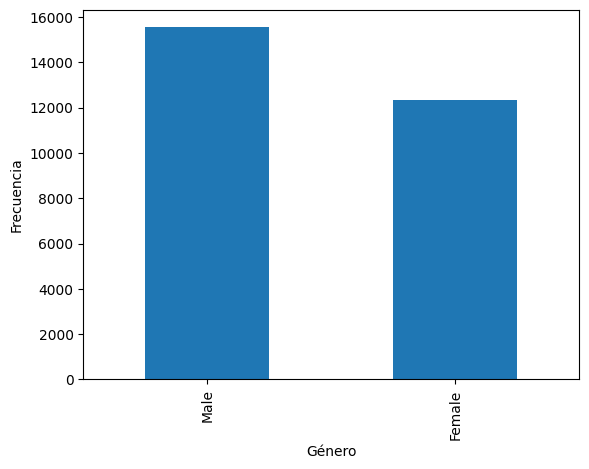

In [ ]:
ax = df['gender'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Género")

In [ ]:
df['gender'].value_counts()

,count
gender,
Male,15547
Female,12354


In [ ]:
df['gender'].value_counts()*100/len(df)

,count
gender,
Male,55.722
Female,44.278


-Analisis de outliers para la variable city


In [ ]:
df['city'].value_counts()

,count
city,
Kalyan,1571
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


In [ ]:
df['city'].value_counts()*100/len(df)

,count
city,
Kalyan,5.631
Srinagar,4.917
Hyderabad,4.803
Vasai-Virar,4.623
Lucknow,4.140
Thane,4.082
Ludhiana,3.982
Agra,3.921
Surat,3.864


In [ ]:
df['city'] = df['city'].replace('Harsh', 'Other')


Text(0.5, 0, 'Ciudad')

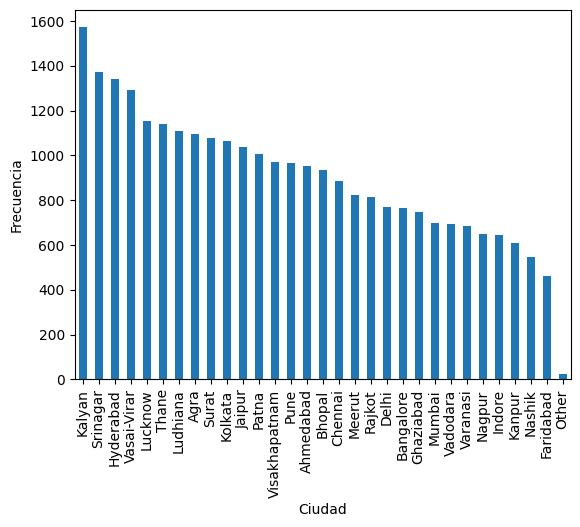

In [ ]:
#Analisis de outliers para la variable city
ax = df['city'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Ciudad")

In [ ]:
df['city'].value_counts()

,count
city,
Kalyan,1571
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


In [ ]:
df['city'].value_counts()*100/len(df)

,count
city,
Kalyan,5.631
Srinagar,4.917
Hyderabad,4.803
Vasai-Virar,4.623
Lucknow,4.140
Thane,4.082
Ludhiana,3.982
Agra,3.921
Surat,3.864


Analisis de la variable sleep_duration

In [ ]:
df['sleep_duration'].value_counts()*100/len(df)

,count
sleep_duration,
Less than 5 hours,29.784
7-8 hours,26.329
5-6 hours,22.160
More than 8 hours,21.662
Others,0.065


In [ ]:
df = df[df['sleep_duration'] != 'Others']

In [ ]:
df['sleep_duration'].value_counts()

,count
sleep_duration,
Less than 5 hours,8310
7-8 hours,7346
5-6 hours,6183
More than 8 hours,6044


Text(0.5, 0, 'Duración de sueño')

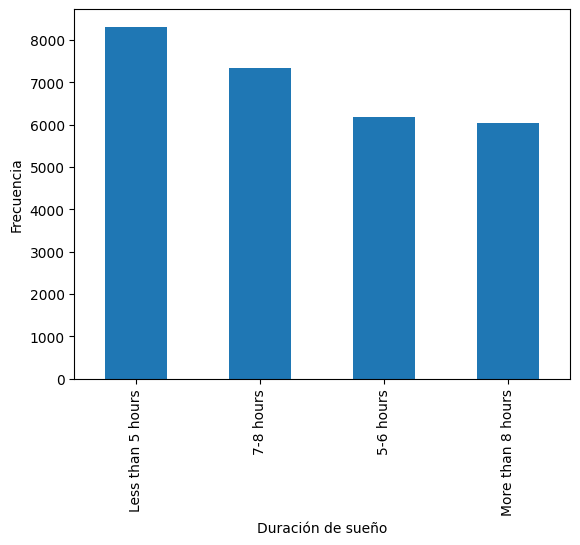

In [ ]:
#Analisis de outliers para la variable sleep_duration
ax = df['sleep_duration'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Duración de sueño")

Analisis de la variable dietary_habits

Text(0.5, 0, 'Habitos dieteticos')

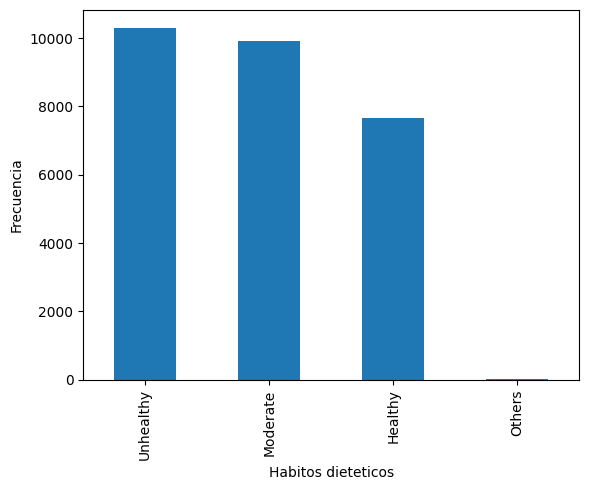

In [ ]:
ax = df['dietary_habits'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Habitos dieteticos")

In [ ]:
df['dietary_habits'].value_counts()*100/len(df)

,count
dietary_habits,
Unhealthy,36.972
Moderate,35.556
Healthy,27.429
Others,0.043


In [ ]:
df = df[df['dietary_habits'] != 'Others']

In [ ]:
df['dietary_habits'].value_counts()*100/len(df)

,count
dietary_habits,
Unhealthy,36.988
Moderate,35.571
Healthy,27.441


Text(0.5, 0, 'Habitos dieteticos')

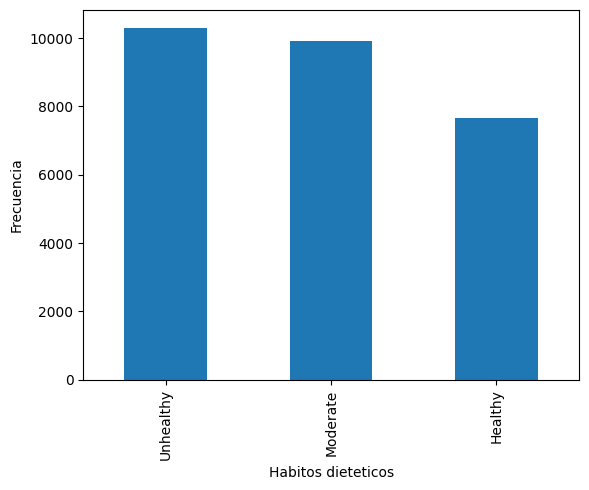

In [ ]:
ax = df['dietary_habits'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Habitos dieteticos")

Analisis para la columna degree

In [ ]:
df['degree'].value_counts()*100/len(df)

,count
degree,
Class 12,21.811
B.Ed,6.692
B.Com,5.396
B.Arch,5.296
BCA,5.138
MSc,4.266
B.Tech,4.130
MCA,3.735
M.Tech,3.660


In [ ]:
df = df[df['degree'] != 'Others']


Text(0.5, 0, 'Grado')

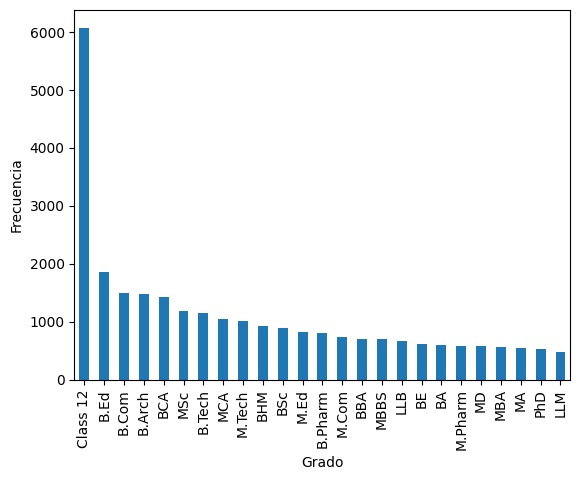

In [ ]:
ax = df['degree'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Grado")

Analisis para la columna suicidal_thoughts

In [ ]:
df['suicidal_thoughts'].value_counts()*100/len(df)

,count
suicidal_thoughts,
Yes,63.281
No,36.719


Text(0.5, 0, 'Pensamientos suicidas')

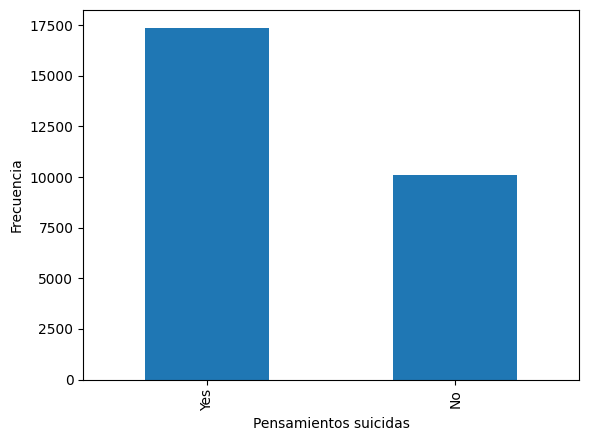

In [ ]:
ax = df['suicidal_thoughts'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Pensamientos suicidas")

Analisis para la columna financial_stress

In [ ]:
df['financial_stress'].value_counts()*100/len(df)

,count
financial_stress,
5,24.067
4,20.698
3,18.731
1,18.354
2,18.139
?,0.011


In [ ]:
df = df[df['financial_stress'] != '?']

Text(0.5, 0, 'Estres financiero')

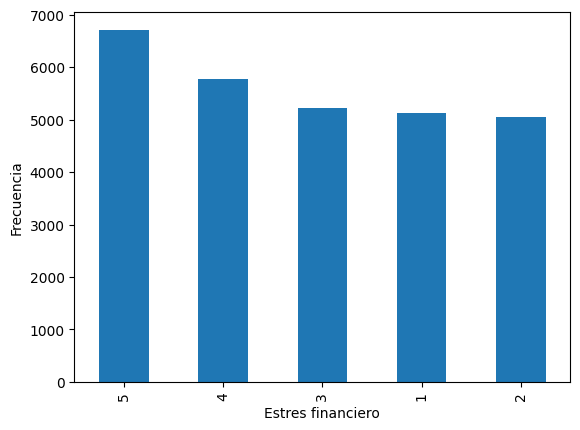

In [ ]:
ax = df['financial_stress'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Estres financiero")

Analisis para la columna family_history_mental_illness

In [ ]:
df['family_history_mental_illness'].value_counts()*100/len(df)

,count
family_history_mental_illness,
No,51.606
Yes,48.394


Text(0.5, 0, 'Antecedentes familiares de enfermedad mental')

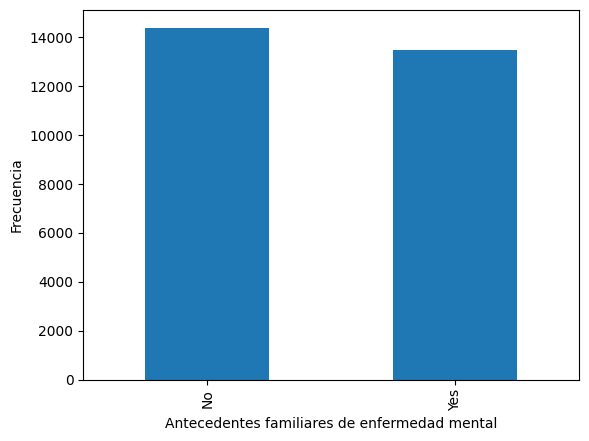

In [ ]:
ax = df['family_history_mental_illness'].value_counts().plot(kind='bar');
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Antecedentes familiares de enfermedad mental")

Analisis de las columnas numericas

In [ ]:
df_num = df.select_dtypes(include='number').copy()

In [ ]:
df_num

,id,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work_study_hours,depression
0,2,33,5,0,8.970,2,0,3,1
1,8,24,2,0,5.900,5,0,3,0
2,26,31,3,0,7.030,5,0,9,0
3,30,28,3,0,5.590,2,0,4,1
4,32,25,4,0,8.130,3,0,1,0
...,...,...,...,...,...,...,...,...,...
27896,140685,27,5,0,5.750,5,0,7,0
27897,140686,27,2,0,9.400,3,0,0,0
27898,140689,31,3,0,6.610,4,0,12,0
27899,140690,18,5,0,6.880,2,0,10,1


In [ ]:
print(df_num.shape)
df_num.isna().sum().sort_values(ascending=False)

(27898, 9)


,0
id,0
age,0
academic_pressure,0
work_pressure,0
cgpa,0
study_satisfaction,0
job_satisfaction,0
work_study_hours,0
depression,0


In [ ]:
#Analizamos con estadísticos básicos como se comporta el promedio y la media
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27898.000,70442.953,40642.015,2.000,35040.750,70689.000,105824.750,140699.000
age,27898.000,25.822,4.906,18.000,21.000,25.000,30.000,59.000
academic_pressure,27898.000,3.141,1.381,0.000,2.000,3.000,4.000,5.000
work_pressure,27898.000,0.000,0.044,0.000,0.000,0.000,0.000,5.000
cgpa,27898.000,7.656,1.471,0.000,6.290,7.770,8.920,10.000
study_satisfaction,27898.000,2.944,1.361,0.000,2.000,3.000,4.000,5.000
job_satisfaction,27898.000,0.001,0.044,0.000,0.000,0.000,0.000,4.000
work_study_hours,27898.000,7.157,3.708,0.000,4.000,8.000,10.000,12.000
depression,27898.000,0.586,0.493,0.000,0.000,1.000,1.000,1.000


CGPA (Calificación promedio)

In [ ]:
# Calcular la mediana de cgpa
valor_mediana_cgpa = df_num['cgpa'].median()
print("Mediana de cgpa:", valor_mediana_cgpa)

Mediana de cgpa: 7.77


In [ ]:
# Reemplazar los valores 0 por la mediana
df_num['cgpa'] = df_num['cgpa'].replace(0, valor_mediana_cgpa)

In [ ]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27898.000,70442.953,40642.015,2.000,35040.750,70689.000,105824.750,140699.000
age,27898.000,25.822,4.906,18.000,21.000,25.000,30.000,59.000
academic_pressure,27898.000,3.141,1.381,0.000,2.000,3.000,4.000,5.000
work_pressure,27898.000,0.000,0.044,0.000,0.000,0.000,0.000,5.000
cgpa,27898.000,7.659,1.464,5.030,6.290,7.770,8.920,10.000
study_satisfaction,27898.000,2.944,1.361,0.000,2.000,3.000,4.000,5.000
job_satisfaction,27898.000,0.001,0.044,0.000,0.000,0.000,0.000,4.000
work_study_hours,27898.000,7.157,3.708,0.000,4.000,8.000,10.000,12.000
depression,27898.000,0.586,0.493,0.000,0.000,1.000,1.000,1.000


Study Satisfaction (Satisfacción con el estudio)

In [ ]:
# Calcular la mediana de study_satisfaction
valor_mediana_satisfaction = df_num['study_satisfaction'].median()
print("Mediana de study_satisfaction:", valor_mediana_satisfaction)

Mediana de study_satisfaction: 3.0


In [ ]:
# Reemplazar los valores 0 por la mediana
df_num['study_satisfaction'] = df_num['study_satisfaction'].replace(0, valor_mediana_satisfaction)

In [ ]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27898.000,70442.953,40642.015,2.000,35040.750,70689.000,105824.750,140699.000
age,27898.000,25.822,4.906,18.000,21.000,25.000,30.000,59.000
academic_pressure,27898.000,3.141,1.381,0.000,2.000,3.000,4.000,5.000
work_pressure,27898.000,0.000,0.044,0.000,0.000,0.000,0.000,5.000
cgpa,27898.000,7.659,1.464,5.030,6.290,7.770,8.920,10.000
study_satisfaction,27898.000,2.945,1.360,1.000,2.000,3.000,4.000,5.000
job_satisfaction,27898.000,0.001,0.044,0.000,0.000,0.000,0.000,4.000
work_study_hours,27898.000,7.157,3.708,0.000,4.000,8.000,10.000,12.000
depression,27898.000,0.586,0.493,0.000,0.000,1.000,1.000,1.000


Age

In [ ]:
# Eliminar outliers de edad mayores a 40
df_num = df_num[df_num['age'] <= 40]

In [ ]:
# Verificar que se eliminaron correctamente
print(df_num['age'].describe())

count   27879.000
mean       25.807
std         4.872
min        18.000
25%        21.000
50%        25.000
75%        30.000
max        39.000
Name: age, dtype: float64


In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27879 entries, 0 to 27900
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  27879 non-null  int64  
 1   age                 27879 non-null  int64  
 2   academic_pressure   27879 non-null  int64  
 3   work_pressure       27879 non-null  int64  
 4   cgpa                27879 non-null  float64
 5   study_satisfaction  27879 non-null  int64  
 6   job_satisfaction    27879 non-null  int64  
 7   work_study_hours    27879 non-null  int64  
 8   depression          27879 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 2.1 MB


In [ ]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
id,27879.000,70444.744,40641.217,2.000,35049.500,70700.000,105822.500,140699.000
age,27879.000,25.807,4.872,18.000,21.000,25.000,30.000,39.000
academic_pressure,27879.000,3.141,1.381,0.000,2.000,3.000,4.000,5.000
work_pressure,27879.000,0.000,0.044,0.000,0.000,0.000,0.000,5.000
cgpa,27879.000,7.659,1.464,5.030,6.290,7.770,8.920,10.000
study_satisfaction,27879.000,2.945,1.360,1.000,2.000,3.000,4.000,5.000
job_satisfaction,27879.000,0.001,0.044,0.000,0.000,0.000,0.000,4.000
work_study_hours,27879.000,7.157,3.707,0.000,4.000,8.000,10.000,12.000
depression,27879.000,0.586,0.493,0.000,0.000,1.000,1.000,1.000


<Axes: >

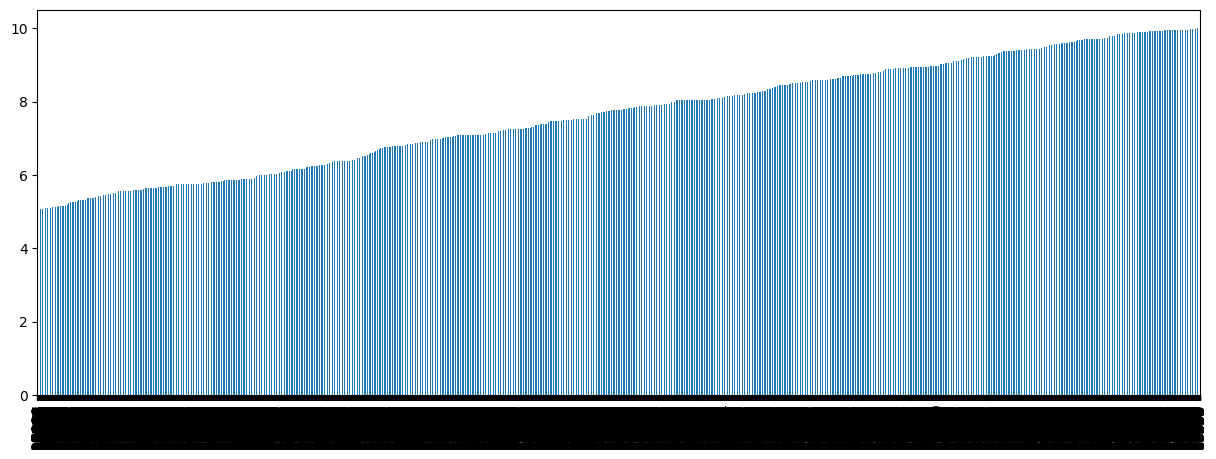

In [ ]:
df_num['cgpa'].sort_values(ascending=True).plot.bar(figsize=(15,5))

<Axes: ylabel='Frequency'>

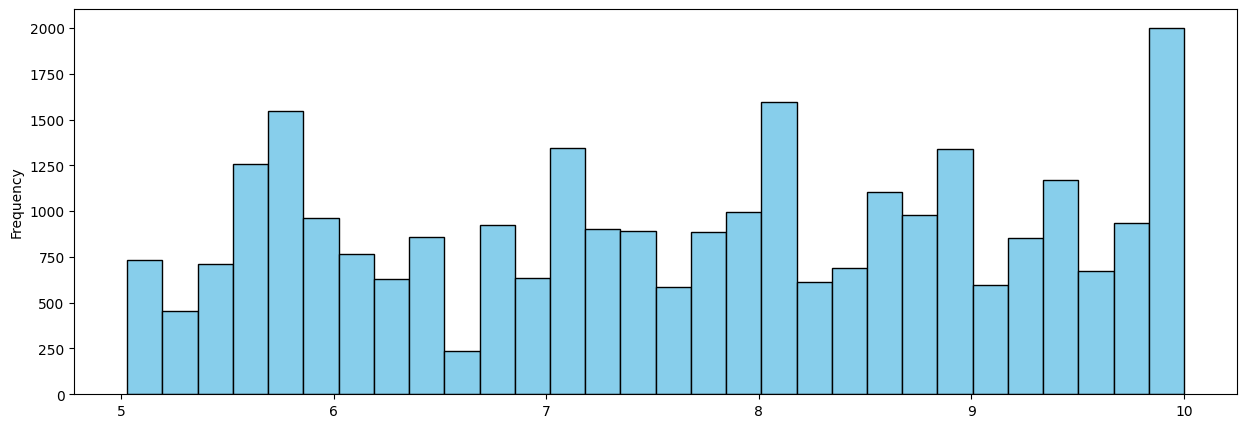

In [ ]:
df_num['cgpa'].plot.hist(bins=30, figsize=(15,5), color='skyblue', edgecolor='black')


<Axes: ylabel='cgpa'>

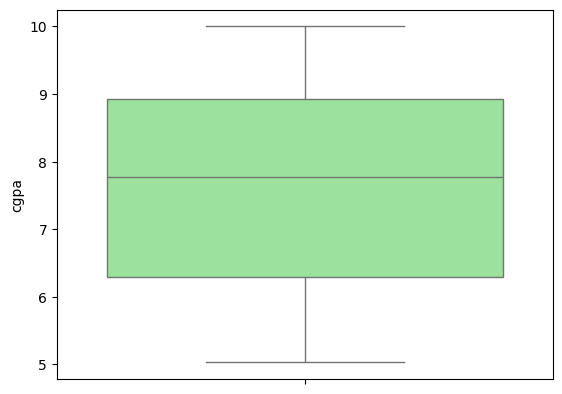

In [ ]:
sns.boxplot(y=df_num['cgpa'], color='lightgreen')

<Axes: ylabel='Frequency'>

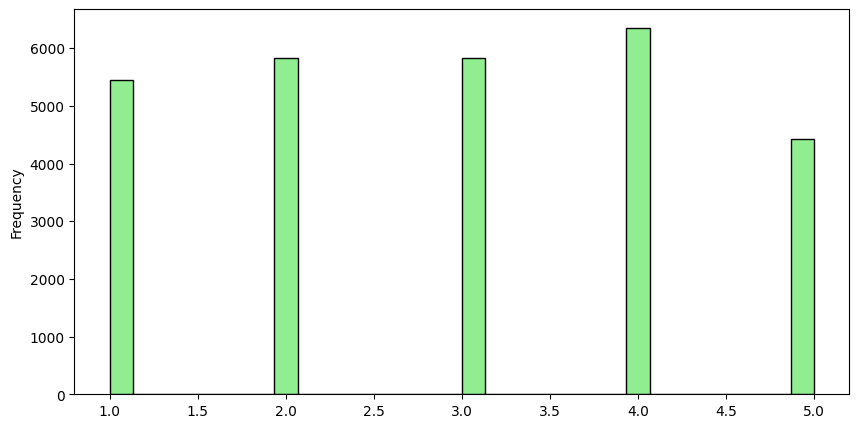

In [ ]:
df_num['study_satisfaction'].plot.hist(bins=30, figsize=(10,5), color='lightgreen', edgecolor='black')

<Axes: ylabel='cgpa'>

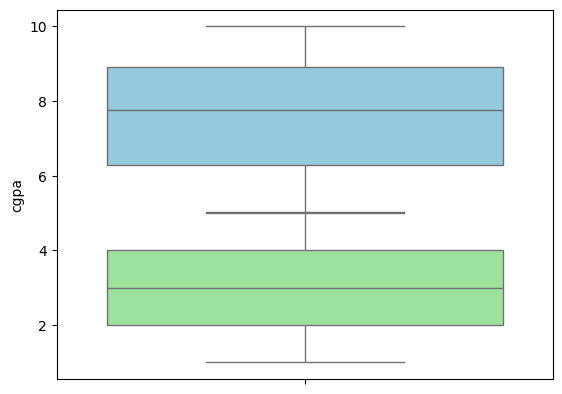

In [ ]:
sns.boxplot(y=df_num['cgpa'], color='skyblue')
sns.boxplot(y=df_num['study_satisfaction'], color='lightgreen')

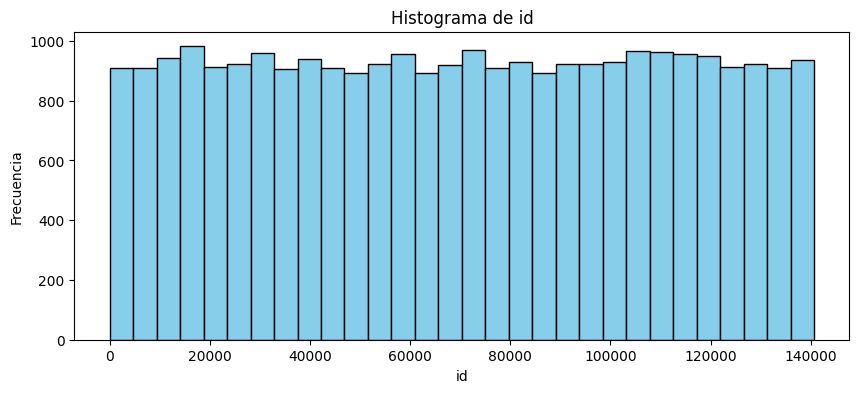

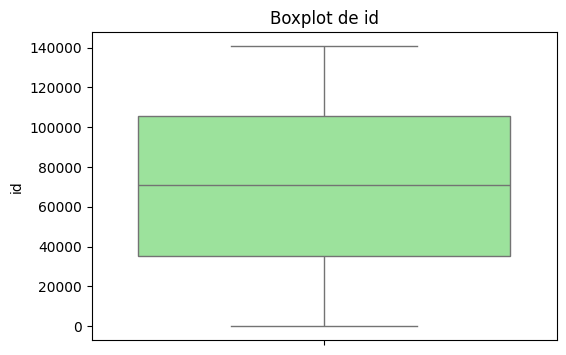

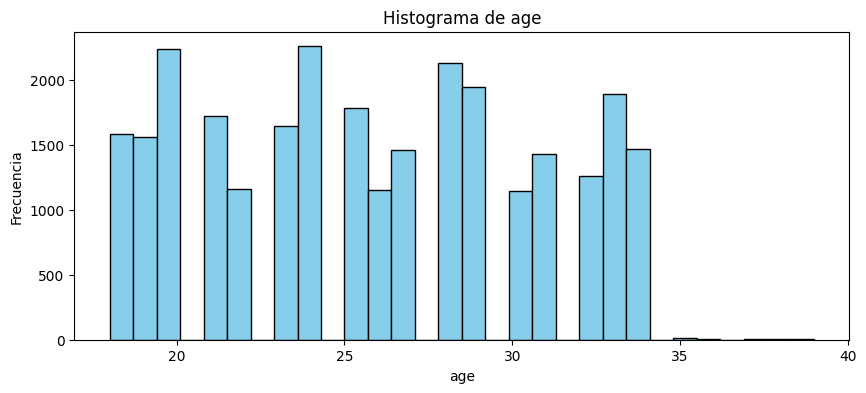

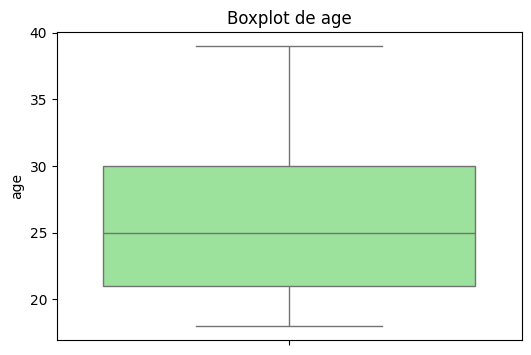

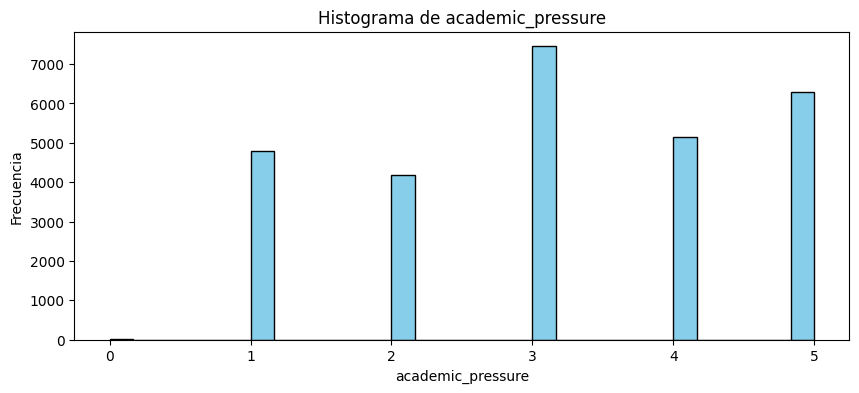

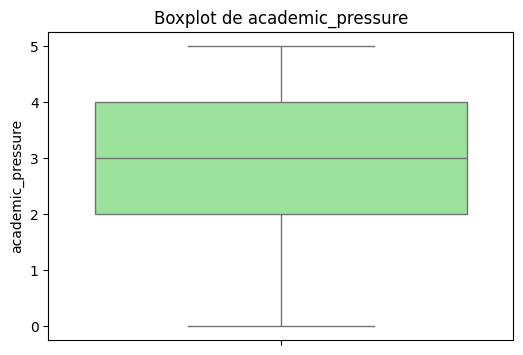

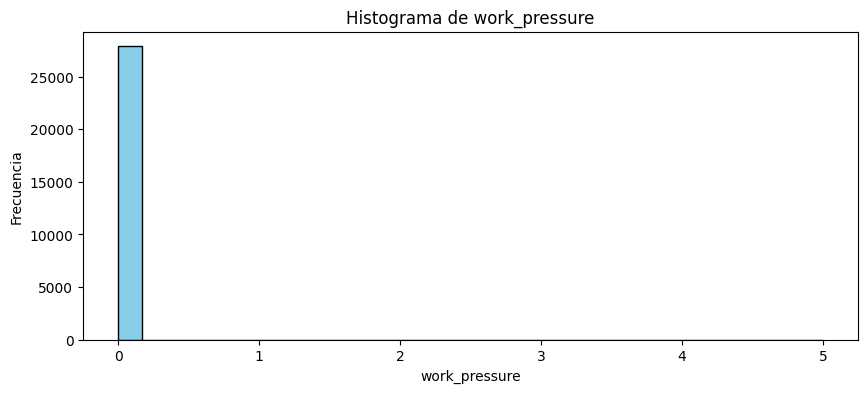

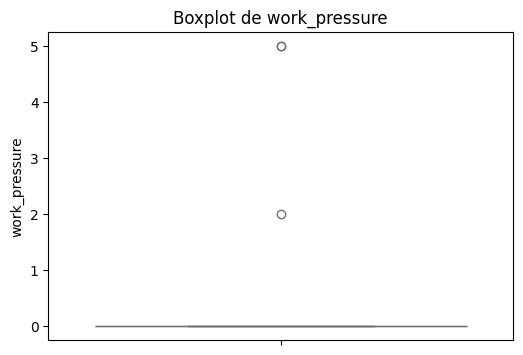

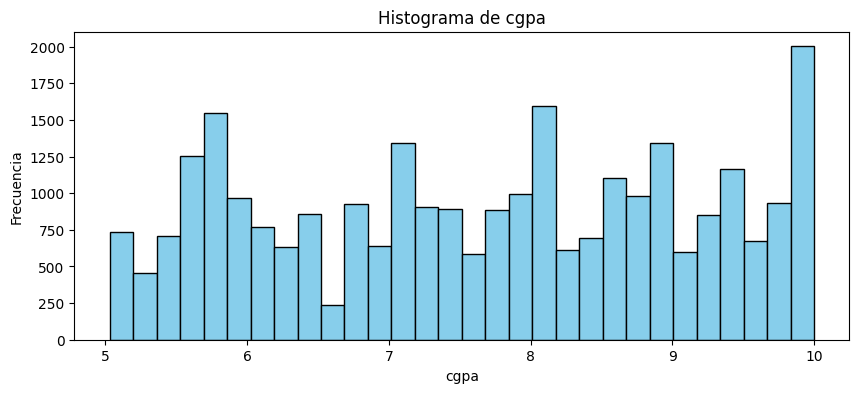

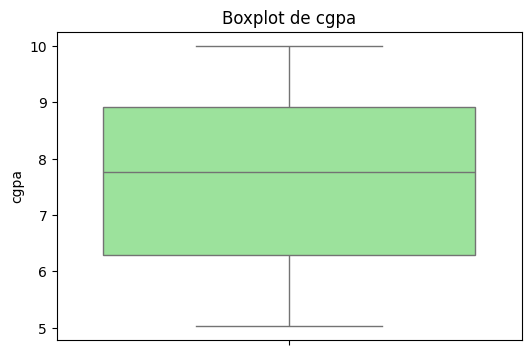

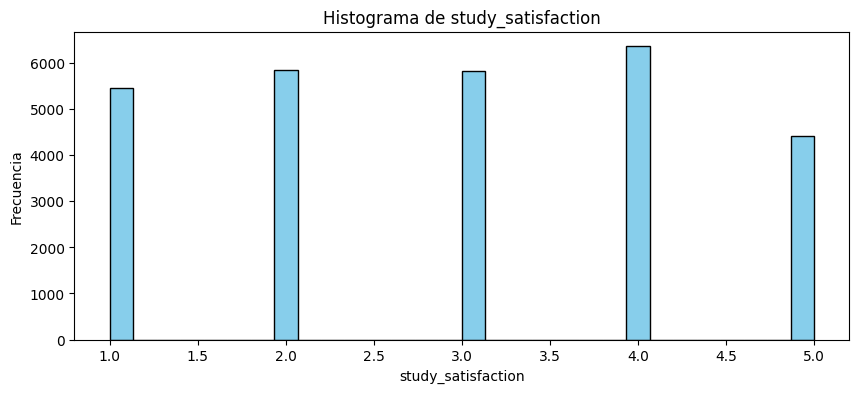

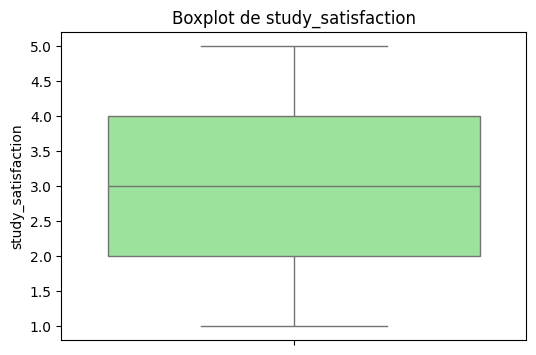

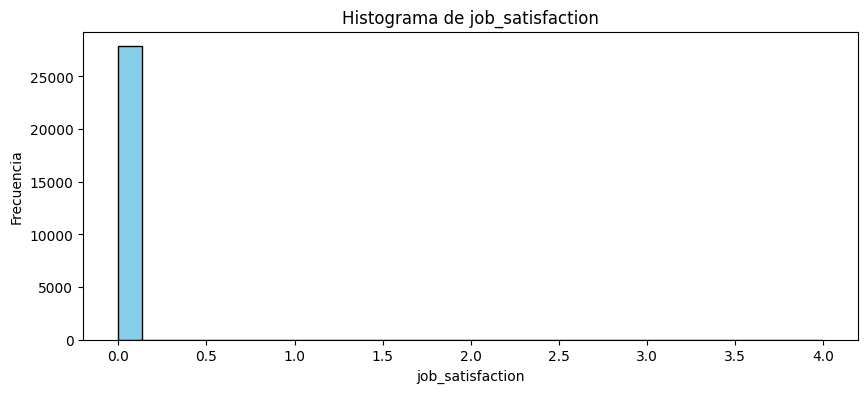

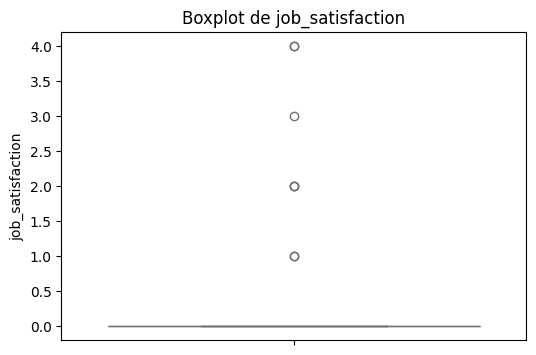

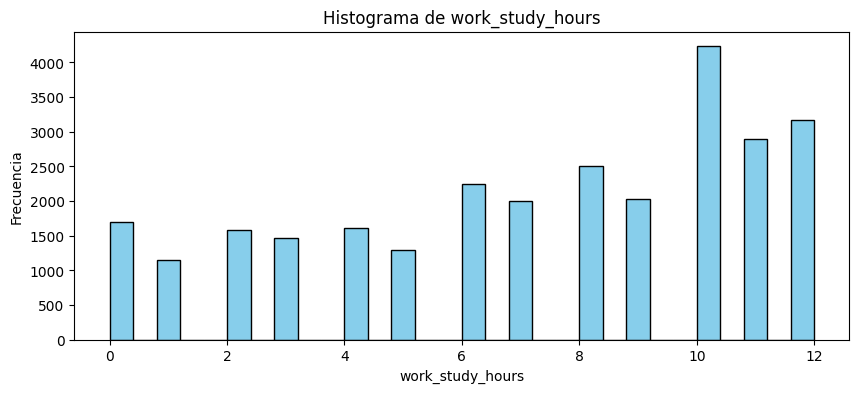

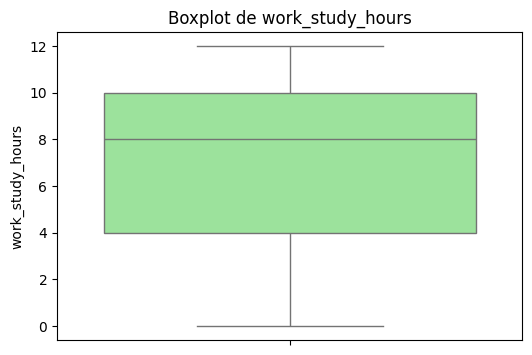

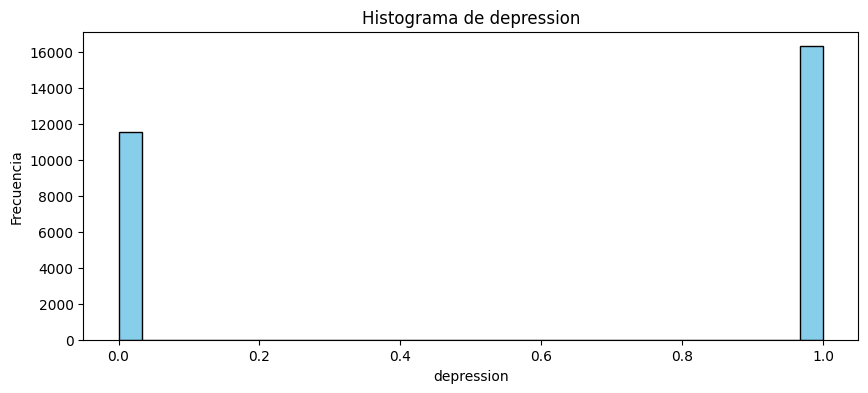

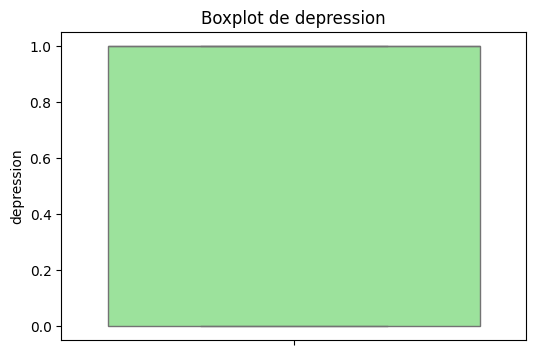

In [ ]:
# Loop para generar histogramas y boxplots de todas las variables numéricas
for col in df_num.columns:
    # Histograma
    plt.figure(figsize=(10,4))
    plt.hist(df_num[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df_num[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.show()


**2.2:EDA**

Analisis Univariado

/tmp/ipython-input-3972760554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='depression', data=df, palette='Set2')


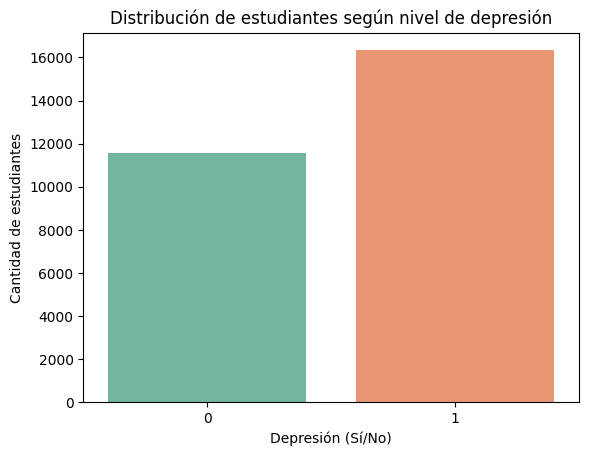

In [ ]:
#Distribución de la variable objetivo (Depresión)
sns.countplot(x='depression', data=df, palette='Set2')
plt.title('Distribución de estudiantes según nivel de depresión')
plt.xlabel('Depresión (Sí/No)')
plt.ylabel('Cantidad de estudiantes')
plt.show()

/tmp/ipython-input-4092000297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sleep_duration', data=df, order=df['sleep_duration'].value_counts().index, palette='coolwarm')


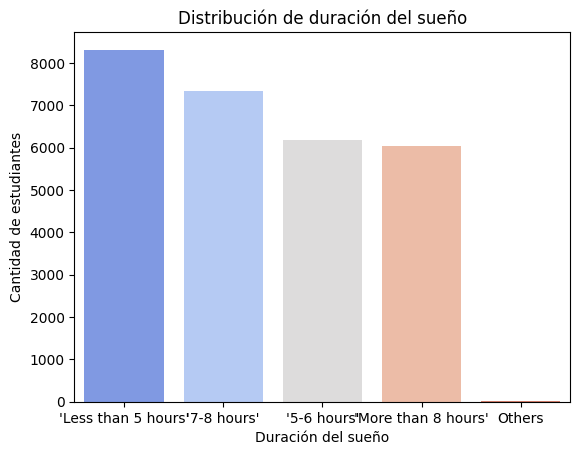

In [ ]:
#Distribución de horas de sueño
sns.countplot(x='sleep_duration', data=df, order=df['sleep_duration'].value_counts().index, palette='coolwarm')
plt.title('Distribución de duración del sueño')
plt.xlabel('Duración del sueño')
plt.ylabel('Cantidad de estudiantes')
plt.show()

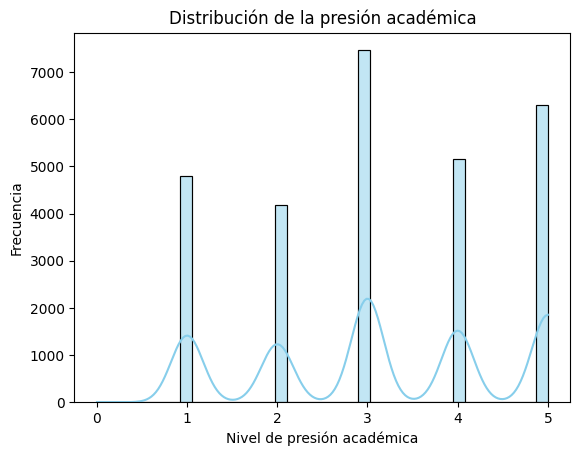

In [ ]:
#Distribución de la presión academica
sns.histplot(df['academic_pressure'], kde=True, color='skyblue')
plt.title('Distribución de la presión académica')
plt.xlabel('Nivel de presión académica')
plt.ylabel('Frecuencia')
plt.show()

Variable vs Target

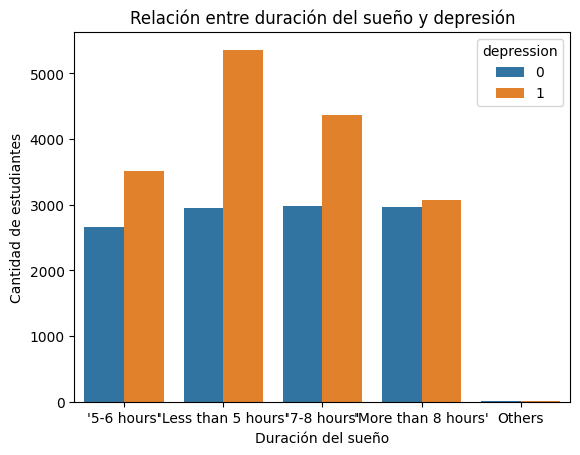

In [ ]:
#Relación entre la duración del sueño y la depresión
sns.countplot(x='sleep_duration', hue='depression', data=df)
plt.title('Relación entre duración del sueño y depresión')
plt.xlabel('Duración del sueño')
plt.ylabel('Cantidad de estudiantes')
plt.show()

Text(0, 0.5, 'Presión académica')

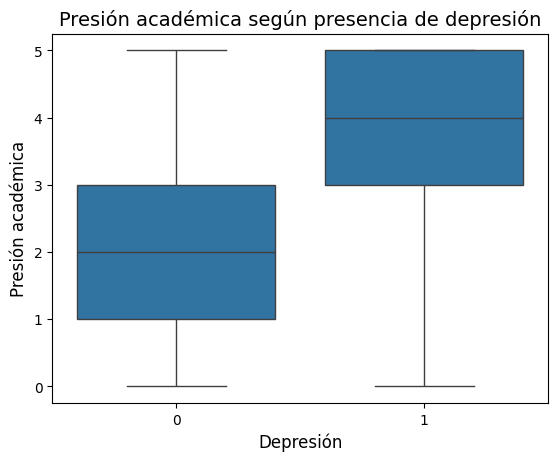

In [ ]:

# Presion academica segun presencia de depresion
sns.boxplot(x='depression', y='academic_pressure', data=df)
plt.title('Presión académica según presencia de depresión', fontsize=14)
plt.xlabel('Depresión', fontsize=12)
plt.ylabel('Presión académica', fontsize=12)

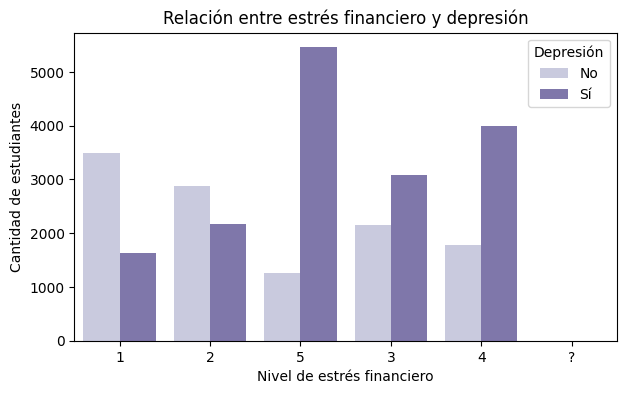

In [ ]:
# Relación entre estrés financiera y depresión
plt.figure(figsize=(7,4))
sns.countplot(x='financial_stress', hue='depression', data=df, palette='Purples')
plt.title('Relación entre estrés financiero y depresión')
plt.xlabel('Nivel de estrés financiero')
plt.ylabel('Cantidad de estudiantes')
plt.legend(title='Depresión', labels=['No', 'Sí'])
plt.show()

Análisis Multivariado


In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de correlación entre variables numéricas')
plt.show()

INSIGHTS
